In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import Corrfunc
from nbodykit.lab import *
import nbodykit
import Corrfunc
from Corrfunc.theory.DD import DD
from astropy.cosmology import LambdaCDM
from astropy.coordinates import SkyCoord, Distance
from astropy import units as u

import utils
import plotter

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

In [3]:
def get_positions(cat):
    catx = np.array(cat['Position'][:,0]).astype(float)
    caty = np.array(cat['Position'][:,1]).astype(float)
    catz = np.array(cat['Position'][:,2]).astype(float)
    return catx, caty, catz

In [4]:
boxsize = 750
nbar_str = '3e-4'
cosmo = cosmology.Planck15
redshift = 0
seed = 0

nbar = float(nbar_str)
boxsize = float(boxsize)

print("Generating power spectrum")
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')

Generating power spectrum


In [6]:
for k,v in cosmo:
    print(k, v)

output vTk dTk mPk
extra metric transfer functions y
h 0.6774
N_ur 2.0328
gauge synchronous
n_s 0.9667
ln10^{10}A_s 3.064
k_pivot 0.05
tau_reio 0.066
T_cmb 2.7255
Omega_cdm 0.2589
Omega_b 0.0486
Omega_k 0.0
N_ncdm 1
m_ncdm [0.06]
P_k_max_h/Mpc 10.0
z_max_pk 100.0


In [10]:
b1 = 1.0
print("Making data catalog")
#s = time.time()
data = LogNormalCatalog(Plin=Plin, nbar=nbar, BoxSize=boxsize, Nmesh=256, bias=b1, seed=seed)
#print('time: {}'.format(time.time()-s))
nd = data.csize

Making data catalog


In [71]:
print('Making random catalog')
random = nbodykit.source.catalog.uniform.UniformCatalog(10*nbar, boxsize, seed=seed)

Making random catalog


In [ ]:
nr = random.csize

In [ ]:
datapos = get_positions(data)

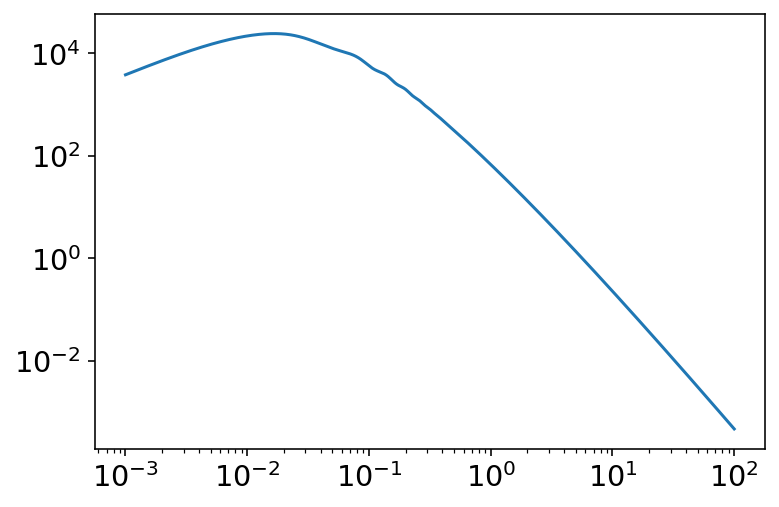

In [13]:
ncont = 1000
k = np.logspace(-3, 2, ncont)
Pk = Plin(k)
plt.loglog(k, Pk)

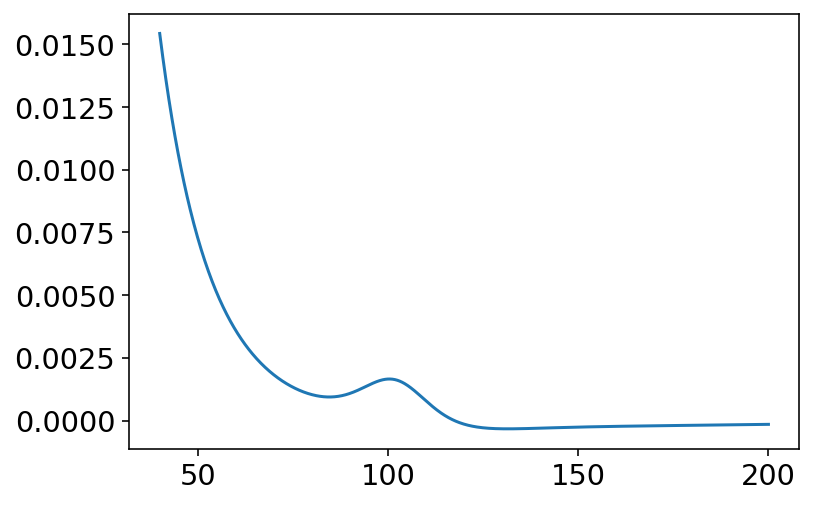

In [17]:
r = np.linspace(40, 200, ncont)
CF = nbodykit.cosmology.correlation.CorrelationFunction(Plin)
xi = CF(r)
plt.plot(r, xi)
#plt.yscale('log')
#plt.ylim()

In [42]:
fcorr = FFTCorr(data, '1d', Nmesh=None, BoxSize=boxsize, rmin=40.0, rmax=200.0, dr=5.0)

In [43]:
fxi = fcorr.run()

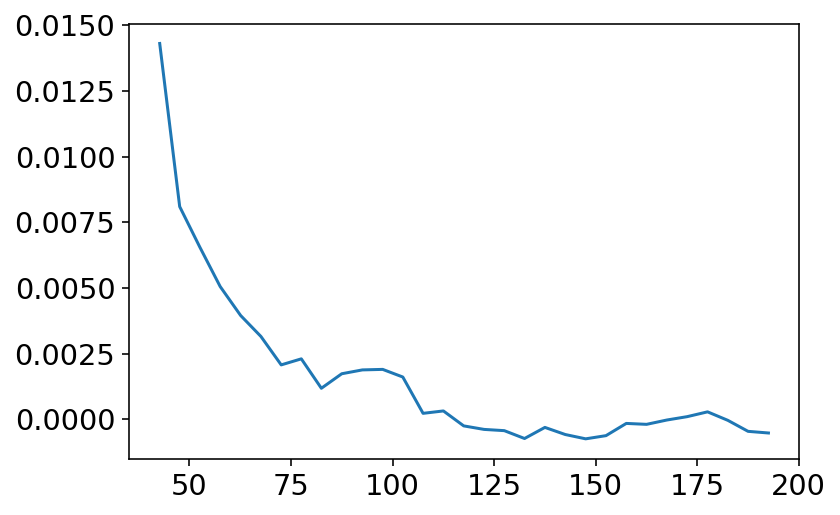

In [44]:
plt.plot(fxi[0]['r'], fxi[0]['corr'])

In [55]:
edges = np.linspace(40, 200, (200-40)/5+1)
dd = SimulationBoxPairCount('1d', data, edges, los='z', BoxSize=boxsize, periodic=True)

In [56]:
sdd = dd.run()

In [68]:
print(dd.pairs)

<BinnedStatistic: dims: (r: 32), variables: ('r', 'npairs', 'wnpairs')>


In [72]:
rr = SimulationBoxPairCount('1d', random, edges, los='z', BoxSize=boxsize, periodic=True)

RuntimeError: calling the function 'Corrfunc.theory.DD.DD' failed, likely due to issues with input data/parameters. Open at issue at https://github.com/bccp/nbodykit/issues for further help.
exception: RuntimeError occurred
stdout: 
stderr: Received signal = `Interrupt' (signo = 2). Aborting 


In [ ]:
srr = rr.run()

In [ ]:
dr = SimulationBoxPairCount('1d', data, edges, second=random, los='z', BoxSize=boxsize, periodic=True)

In [ ]:
sdr = dr.run()

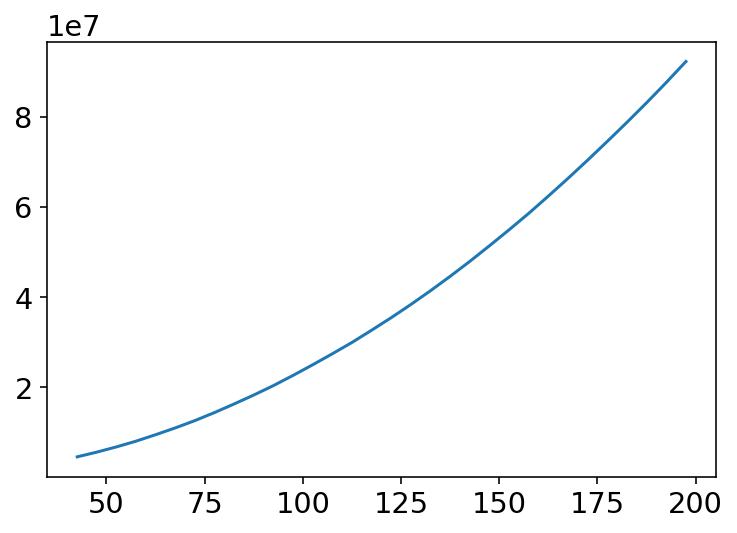

In [69]:
fdr = nr/nd
DD = dd.pairs['npairs']
DR = dr.pairs['npairs']
RR = rr.pairs['npairs']
naive = fdr**2 * dd/rr + 1
ls = fdr**2 * dd/rr - 2*fdr*dr/rr + 1  
plt.plot(dd.pairs['r'], dd.pairs['npairs'])

AttributeError: 'NoneType' object has no attribute 'keys'

## Effect of bias

Making data catalog
Made
FFT
FFTed
Making data catalog
Made
FFT
FFTed
Making data catalog
Made
FFT
FFTed


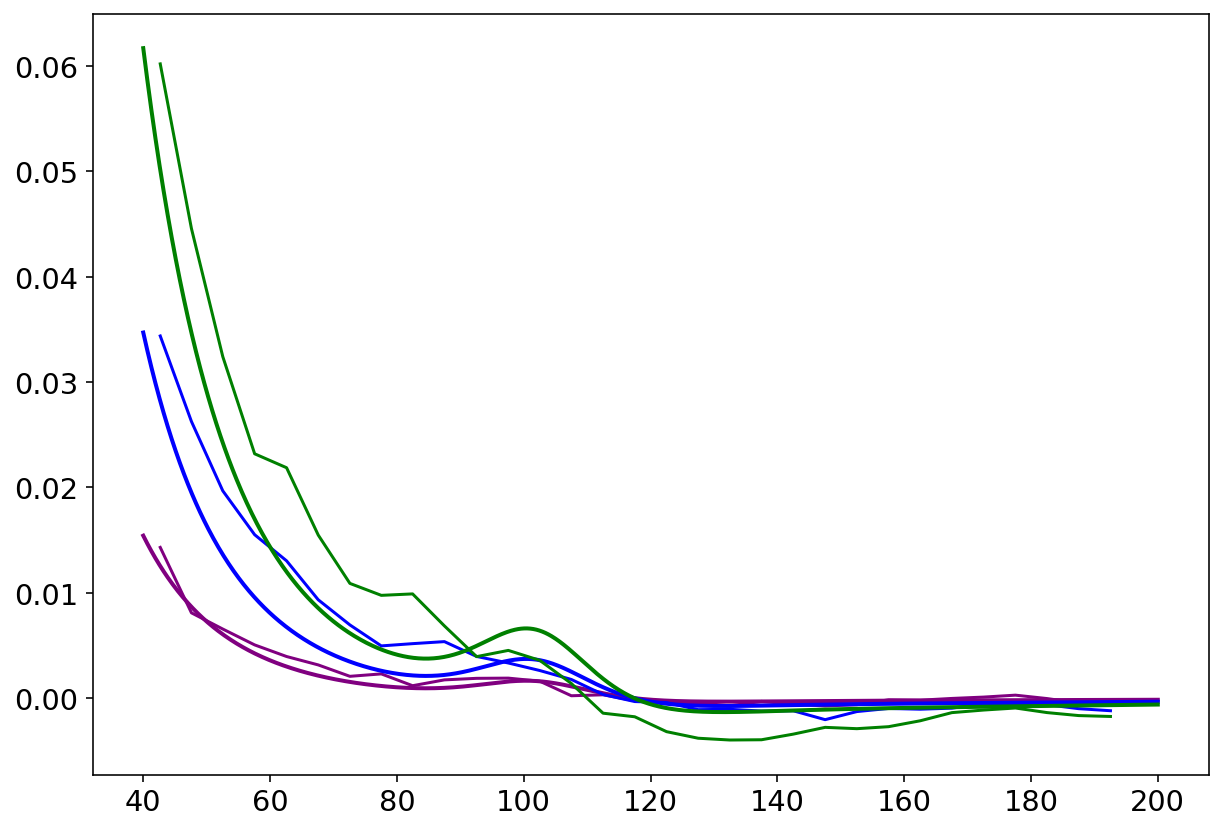

In [50]:

b1s = [1.0, 1.5, 2.0]
#b1s = [1.5]
colors = ['purple','blue','green']
plt.figure(figsize=(10,7))
for i in range(len(b1s)):
    b1 = b1s[i]
    print("Making data catalog")
    #s = time.time()
    data = LogNormalCatalog(Plin=Plin, nbar=nbar, BoxSize=boxsize, Nmesh=256, bias=b1, seed=seed)
    #print('time: {}'.format(time.time()-s))
    print('Made')
    r = np.linspace(40, 200, ncont)
    CF = nbodykit.cosmology.correlation.CorrelationFunction(Plin)
    xi = CF(r)
    
    print('FFT')
    fcorr = FFTCorr(data, '1d', Nmesh=None, BoxSize=boxsize, rmin=40.0, rmax=200.0, dr=5.0)
    fxi = fcorr.run()
    print('FFTed')
    
    plt.plot(fxi[0]['r'], fxi[0]['corr'], color=colors[i])
    plt.plot(r, b1**2*xi, lw=2, color=colors[i])

In [73]:

#b1s = [1.0, 1.5, 2.0]
b1s = [1.5]
colors = ['purple','blue','green']
plt.figure(figsize=(10,7))
for i in range(len(b1s)):
    b1 = b1s[i]
    print("Making data catalog")
    #s = time.time()
    data = LogNormalCatalog(Plin=Plin, nbar=nbar, BoxSize=boxsize, Nmesh=256, bias=b1, seed=seed)
    #print('time: {}'.format(time.time()-s))
    print('Made')
    k = np.logspace(-3, 2, ncont)
    Pk = Plin(k)
    
    print('FFT')
    fpow = FFTPower(data, '1d', Nmesh=None, BoxSize=boxsize, rmin=40.0, rmax=200.0, dr=5.0)
    fpk = fpow.run()
    print('FFTed')
    plt.loglog(fpk['k'], fpk['power'].real - fpk.attrs['shotnoise'])
    
    #plt.plot(fpow[0]['k'], fpow[0]['power'], color=colors[i])
    plt.plot(r, b1**2*Pk, lw=2, color=colors[i])

Making data catalog
Made
FFT


TypeError: __init__() got an unexpected keyword argument 'rmin'

<Figure size 720x504 with 0 Axes>

In [ ]:
boxsize = 750
nbar_str = '1e-4'
mock_tag = '_b2'
cosmo = cosmology.Planck15
redshift = 0
seed = 0

nbar = float(nbar_str)
boxsize = float(boxsize)

print("Generating power spectrum")
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')